# Exploração Inicial os dados com informações climatológicas
Dados disponíveis no [INMET](https://portal.inmet.gov.br/dadoshistoricos)

---

In [44]:
import pandas as pd 
import numpy as np
from utils import *
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
def gerar_dados_clima (cidade_selecionada, id_em_selecionado):
    """
    Função responsável por carregar todos os dados dos anos de 2006 até 2021 disponíveis, de acordo com a 
    regiao, estado, cidade e id da estação meteorológica selecionada pelo usuário. Um arquivo .csv
    será gerado automaticamente e salvo na pasta conforme código abaixo. Aqui também é feito um tratamento inicial
    para renomear as colunas que mudaram de nome do ano de 2019 em diante e também para remover uma coluna irrelevante.
    Também é inserido o nome da cidade em questão em uma coluna para que possa tirar a latitude e longitude, que será 
    utilizada posteriormente.
    """

    df1 = pd.read_csv(f'data/2006/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2006_A_31-12-2006.CSV', encoding="latin-1", sep=';', skiprows=8)
    df2 = pd.read_csv(f'data/2007/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2007_A_31-12-2007.CSV', encoding="latin-1", sep=';', skiprows=8)
    df3 = pd.read_csv(f'data/2008/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2008_A_31-12-2008.CSV', encoding="latin-1", sep=';', skiprows=8)
    df4 = pd.read_csv(f'data/2009/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2009_A_31-12-2009.CSV', encoding="latin-1", sep=';', skiprows=8)
    df5 = pd.read_csv(f'data/2010/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2010_A_31-12-2010.CSV', encoding="latin-1", sep=';', skiprows=8)
    df6 = pd.read_csv(f'data/2011/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2011_A_31-12-2011.CSV', encoding="latin-1", sep=';', skiprows=8)
    df7 = pd.read_csv(f'data/2012/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2012_A_31-12-2012.CSV', encoding="latin-1", sep=';', skiprows=8)
    df8 = pd.read_csv(f'data/2013/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2013_A_31-12-2013.CSV', encoding="latin-1", sep=';', skiprows=8)
    df9 = pd.read_csv(f'data/2014/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2014_A_31-12-2014.CSV', encoding="latin-1", sep=';', skiprows=8)
    df10 = pd.read_csv(f'data/2015/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2015_A_31-12-2015.CSV', encoding="latin-1", sep=';', skiprows=8)
    df11 = pd.read_csv(f'data/2016/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-06-2016_A_31-12-2016.CSV', encoding="latin-1", sep=';', skiprows=8)
    df12 = pd.read_csv(f'data/2017/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2017_A_31-12-2017.CSV', encoding="latin-1", sep=';', skiprows=8)
    df13 = pd.read_csv(f'data/2018/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2018_A_31-12-2018.CSV', encoding="latin-1", sep=';', skiprows=8)
    df14 = pd.read_csv(f'data/2019/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2019_A_31-12-2019.CSV', encoding="latin-1", sep=';', skiprows=8)
    df15 = pd.read_csv(f'data/2020/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2020_A_31-12-2020.CSV', encoding="latin-1", sep=';', skiprows=8)
    df16 = pd.read_csv(f'data/2021/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2021_A_30-11-2021.CSV', encoding="latin-1", sep=';', skiprows=8)

    df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13,
                                df14.rename(columns={'Data':'DATA (YYYY-MM-DD)', 'Hora UTC':'HORA (UTC)', 'RADIACAO GLOBAL (Kj/m²)':'RADIACAO GLOBAL (KJ/m²)'}), 
                                df15.rename(columns={'Data':'DATA (YYYY-MM-DD)', 'Hora UTC':'HORA (UTC)', 'RADIACAO GLOBAL (Kj/m²)':'RADIACAO GLOBAL (KJ/m²)'}), 
                                df16.rename(columns={'Data':'DATA (YYYY-MM-DD)', 'Hora UTC':'HORA (UTC)', 'RADIACAO GLOBAL (Kj/m²)':'RADIACAO GLOBAL (KJ/m²)'})])
    df.drop(['Unnamed: 19'], axis=1, inplace=True)
    df['DATA (YYYY-MM-DD)'] = pd.to_datetime(df['DATA (YYYY-MM-DD)'])
    df.set_index('DATA (YYYY-MM-DD)', inplace=True)
    df['CIDADE'] = f'{cidade_selecionada}'

    lat = pd.Series(df['CIDADE'].unique().tolist(), index=df['CIDADE'].unique().tolist()).apply(geocode).apply(lambda location: location.latitude)
    long = pd.Series(df['CIDADE'].unique().tolist(), index=df['CIDADE'].unique().tolist()).apply(geocode).apply(lambda location: location.longitude)
    lat.name = 'LATITUDE'
    long.name = 'LONGITUDE'
    df_lat = df.merge(lat, how='left', left_on='CIDADE', right_index=True)
    df_lat_long = df_lat.merge(long, how='left', left_on='CIDADE', right_index=True)

    df_lat_long.to_csv(f'data/dados_hist_clima_concatenados/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2006_A_30-11-2021.CSV')

    return df_lat_long

In [46]:
def ler_dados_concatenados(cidade_selecionada, id_em_selecionado):
    """
    Função para realizar a leitura dos dados concatenados gerados na função acima, de acordo com os inputs feitos pelo usuário.
    Também é realizado um tratamento para transformar a coluna de data para seu devido formato. A coluna de horário é removida.
    Todos os dados são transformados em tipo float para poder trabalhar com estatísticas posteriormente.
    Os NA's foram substituídos pela média das colunas, o que não alterou o resultado final (na média) do dataframe.
    """
    df_tratado = pd.read_csv(f'data/dados_hist_clima_concatenados/INMET_S_PR_{id_em_selecionado}_{cidade_selecionada}_01-01-2006_A_30-11-2021.CSV', index_col=False, decimal=',')
    df_tratado['DATA (YYYY-MM-DD)'] = pd.to_datetime(df_tratado['DATA (YYYY-MM-DD)'])
    df_tratado.set_index('DATA (YYYY-MM-DD)', inplace=True)
    df_tratado.drop(['HORA (UTC)'], axis=1, inplace=True)
    df_tratado.iloc[:, 11:15] = df_tratado.iloc[:, 11:15].astype(float) # Os dados precisam ser do tipo float para poder trabalhar com estatísticas
    df_tratado.iloc[:, :17] = df_tratado[df_tratado.iloc[:, :17] > -5] # Pegando apenas medições de números acima de -5 (A temperatura poderia chegar a ser negativa, por isso o limite)
    df_tratado = df_tratado.iloc[:, :17].fillna(df_tratado.iloc[:, :17].mean())
    return df_tratado

In [47]:
df = ler_dados_concatenados('CURITIBA', 'A807')

In [48]:
df

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (KJ/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)"
DATA (YYYY-MM-DD),,,,,,,,,,,,,,,,,
2006-01-01,0.166961,912.795903,913.048509,912.550485,1180.094343,18.252665,13.217227,18.829871,17.717222,13.777565,12.68313,76.19585,70.089615,73.216569,140.674398,5.188453,1.983253
2006-01-01,0.166961,912.795903,913.048509,912.550485,1180.094343,18.252665,13.217227,18.829871,17.717222,13.777565,12.68313,76.19585,70.089615,73.216569,140.674398,5.188453,1.983253
2006-01-01,0.166961,912.795903,913.048509,912.550485,1180.094343,18.252665,13.217227,18.829871,17.717222,13.777565,12.68313,76.19585,70.089615,73.216569,140.674398,5.188453,1.983253
2006-01-01,0.166961,912.795903,913.048509,912.550485,1180.094343,18.252665,13.217227,18.829871,17.717222,13.777565,12.68313,76.19585,70.089615,73.216569,140.674398,5.188453,1.983253
2006-01-01,0.166961,912.795903,913.048509,912.550485,1180.094343,18.252665,13.217227,18.829871,17.717222,13.777565,12.68313,76.19585,70.089615,73.216569,140.674398,5.188453,1.983253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-30,0.000000,902.900000,902.900000,902.700000,1505.600000,28.900000,13.217227,29.500000,28.300000,13.777565,12.68313,76.19585,70.089615,73.216569,219.000000,9.400000,2.800000
2021-11-30,0.000000,903.500000,903.500000,902.900000,659.000000,27.200000,13.217227,29.100000,27.200000,13.777565,12.68313,76.19585,70.089615,73.216569,219.000000,6.700000,3.200000
2021-11-30,0.000000,904.500000,904.500000,903.500000,58.700000,22.700000,13.217227,27.200000,22.700000,13.777565,12.68313,76.19585,70.089615,73.216569,106.000000,7.500000,2.900000


### Selecionando período produtivo da Soja (de Setembro até Março)
---

In [49]:
def periodo_produtivo(df):
    periodo_produtivo = [9, 10, 11, 12, 1, 2, 3] # setembro a março
    df = df[df.index.map(lambda t: t.month in periodo_produtivo)]
    return df

In [50]:
df = periodo_produtivo(df)

### Plots para verificar a distribuição dos dados
---

In [51]:
sns.set_palette("Accent")
sns.set_style("darkgrid")

Text(0.5, 1.0, 'Distribuição de Frequências')

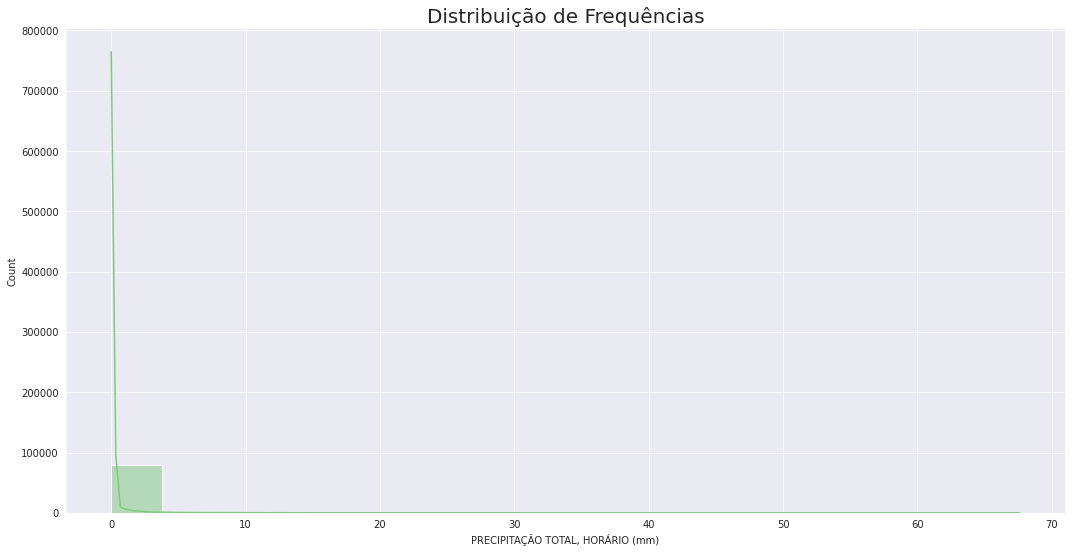

In [52]:
ax = sns.displot(df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], kde=True)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Precipitação'}, ylabel='(mm)'>

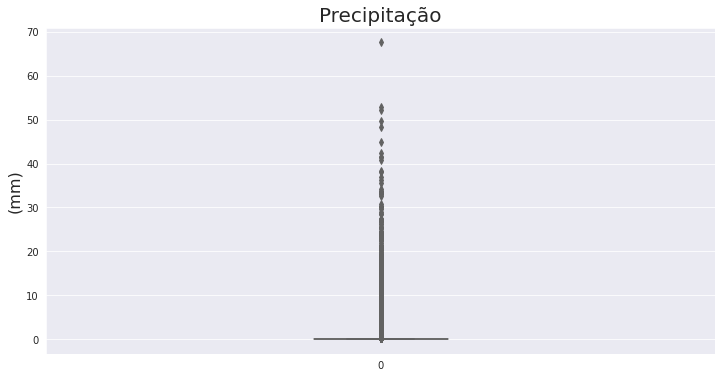

In [53]:
ax = sns.boxplot(data=df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Precipitação', fontsize=20)
ax.set_ylabel('(mm)', fontsize=16)
ax

Text(0.5, 1.0, 'Distribuição de Frequências')

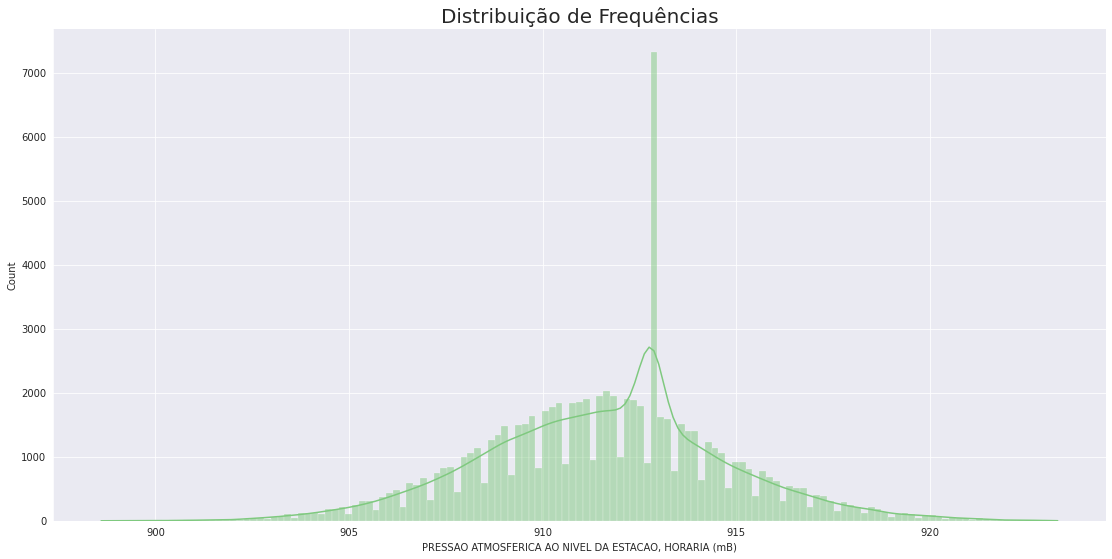

In [54]:
ax = sns.displot(df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'], kde=True)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Pressão ATM Estação'}, ylabel='(mB)'>

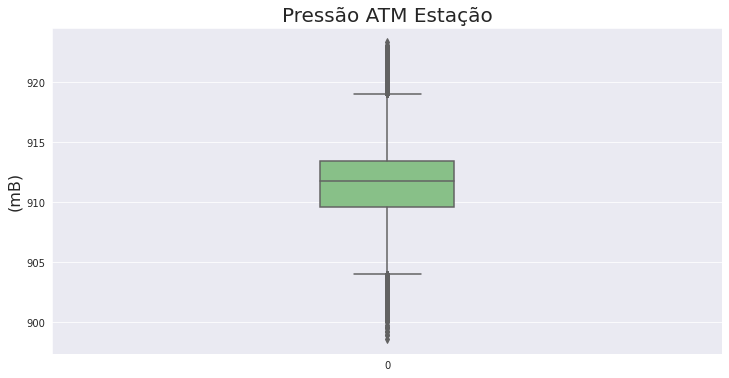

In [55]:
ax = sns.boxplot(data=df['PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Pressão ATM Estação', fontsize=20)
ax.set_ylabel('(mB)', fontsize=16)
ax

Text(0.5, 1.0, 'Distribuição de Frequências')

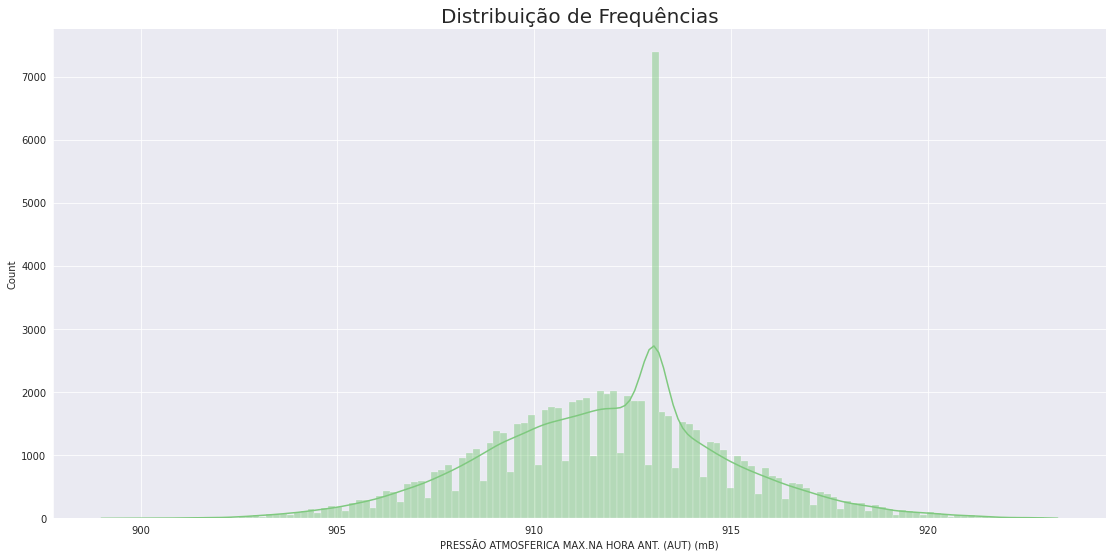

In [56]:
ax = sns.displot(df['PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)'], kde=True)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Pressão ATM MAX'}, ylabel='(mB)'>

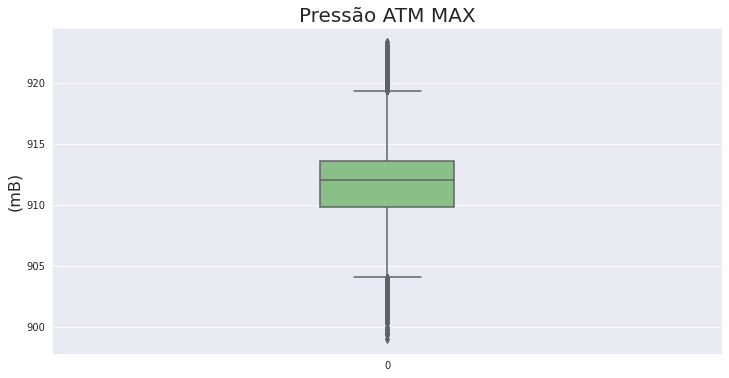

In [57]:
ax = sns.boxplot(data=df['PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Pressão ATM MAX', fontsize=20)
ax.set_ylabel('(mB)', fontsize=16)
ax

Text(0.5, 1.0, 'Distribuição de Frequências')

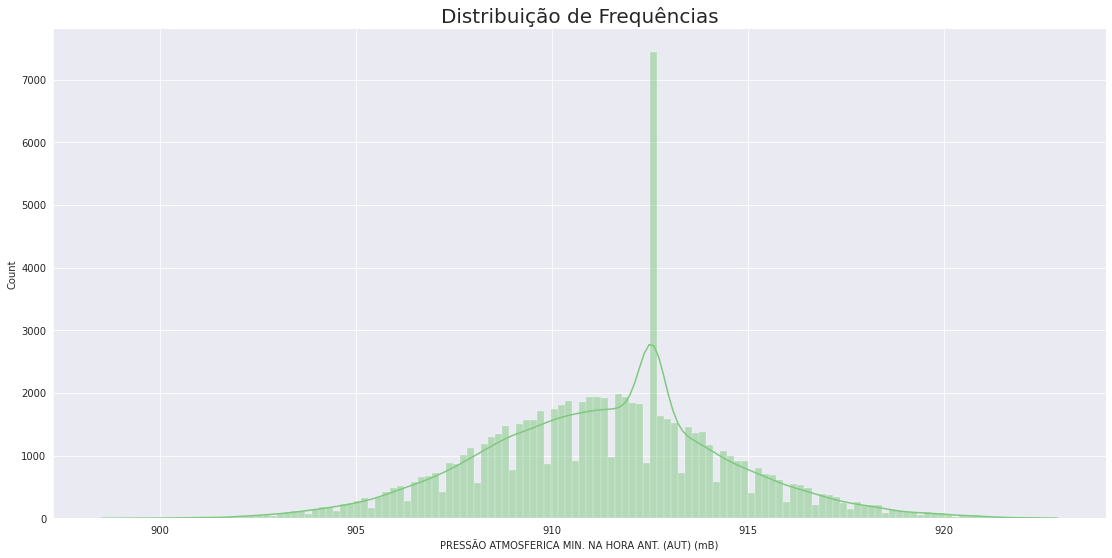

In [58]:
ax = sns.displot(df['PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'], kde=True)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Pressão ATM MIN'}, ylabel='(mB)'>

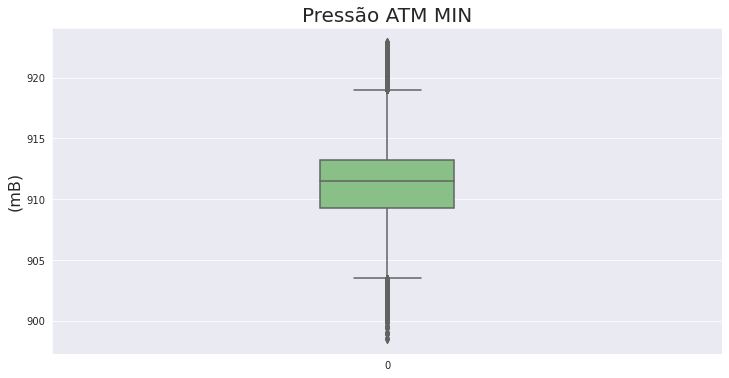

In [59]:
ax = sns.boxplot(data=df['PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Pressão ATM MIN', fontsize=20)
ax.set_ylabel('(mB)', fontsize=16)
ax

Text(0.5, 1.0, 'Distribuição de Frequências')

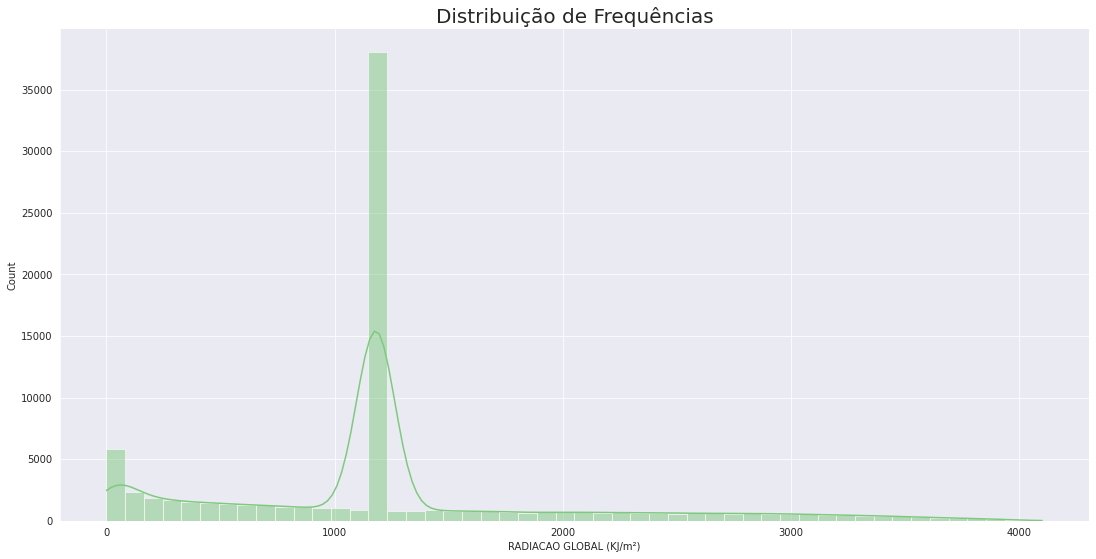

In [60]:
ax = sns.displot(df['RADIACAO GLOBAL (KJ/m²)'], kde=True, bins=50)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Radiação Global'}, ylabel='KJ/m²'>

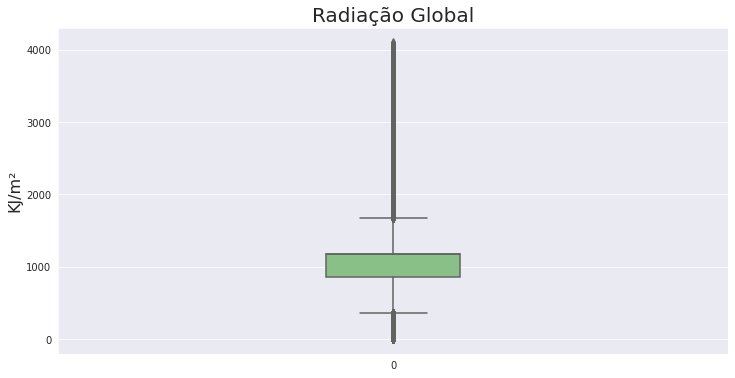

In [61]:
ax = sns.boxplot(data=df['RADIACAO GLOBAL (KJ/m²)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Radiação Global', fontsize=20)
ax.set_ylabel('KJ/m²', fontsize=16)
ax

Text(0.5, 1.0, 'Distribuição de Frequências')

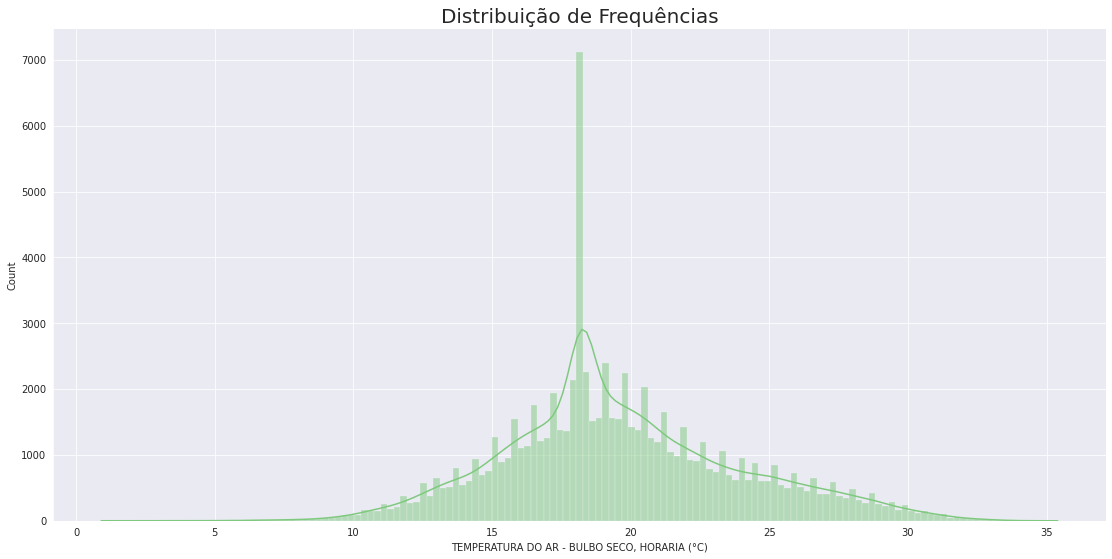

In [62]:
ax = sns.displot(df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], kde=True)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Temperatura do Ar - Bulbo Seco'}, ylabel='ºC'>

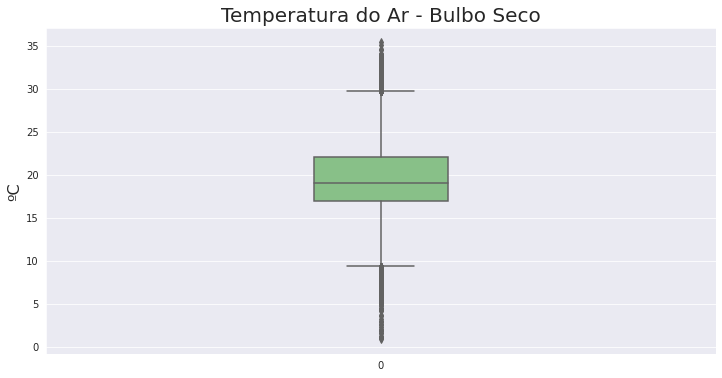

In [63]:
ax = sns.boxplot(data=df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Temperatura do Ar - Bulbo Seco', fontsize=20)
ax.set_ylabel('ºC', fontsize=16)
ax

Text(0.5, 1.0, 'Distribuição de Frequências')

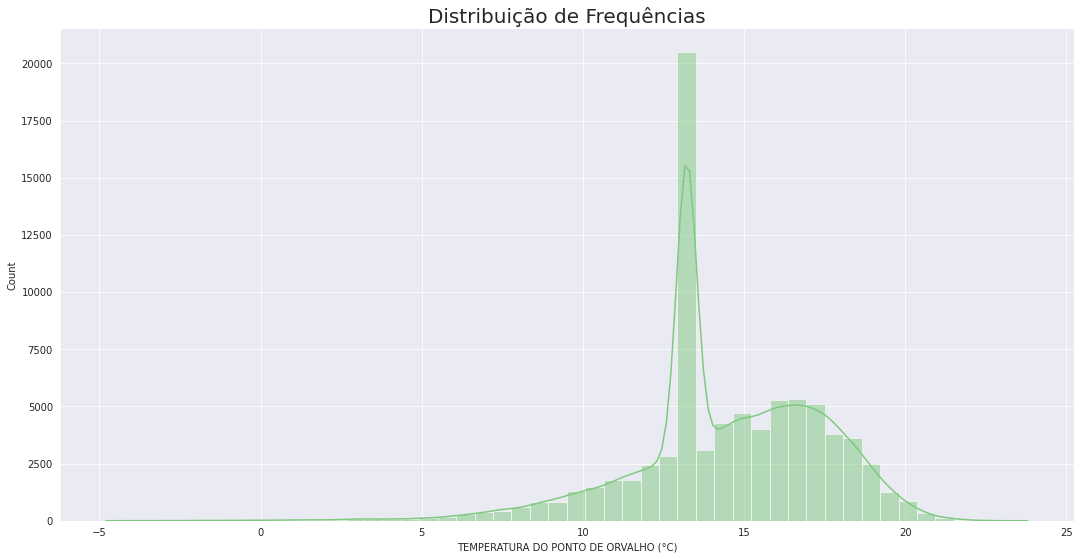

In [64]:
ax = sns.displot(df['TEMPERATURA DO PONTO DE ORVALHO (°C)'], kde=True, bins=50)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Temperatura do Ponto de Orvalho'}, ylabel='ºC'>

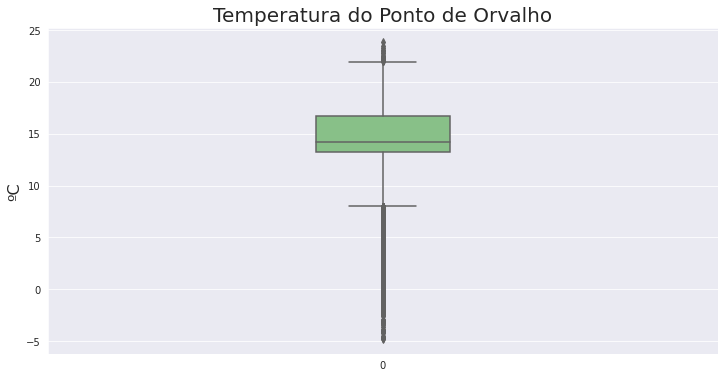

In [65]:
ax = sns.boxplot(data=df['TEMPERATURA DO PONTO DE ORVALHO (°C)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Temperatura do Ponto de Orvalho', fontsize=20)
ax.set_ylabel('ºC', fontsize=16)
ax

Text(0.5, 1.0, 'Distribuição de Frequências')

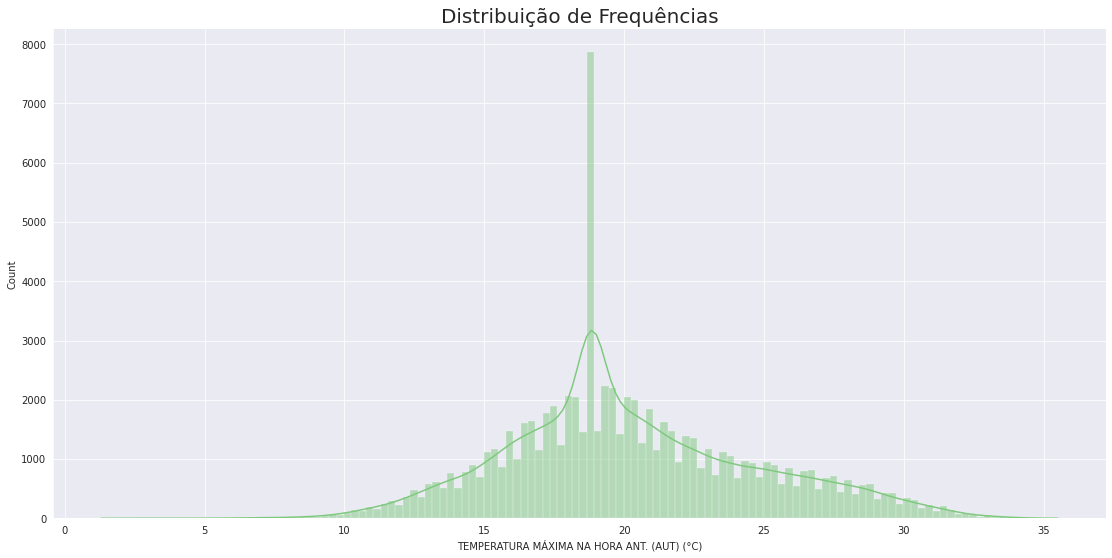

In [66]:
ax = sns.displot(df['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'], kde=True)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Temperatura Máxima'}, ylabel='ºC'>

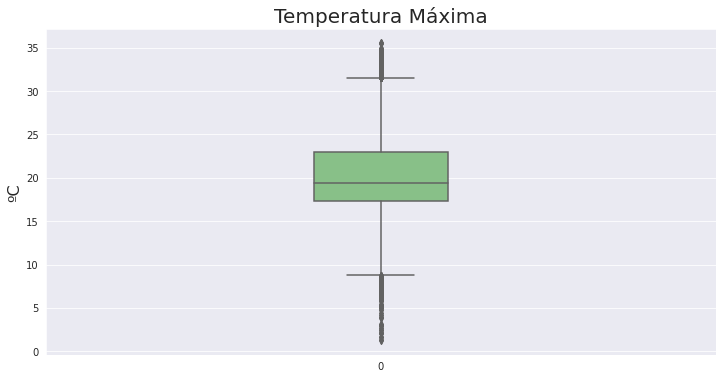

In [67]:
ax = sns.boxplot(data=df['TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Temperatura Máxima', fontsize=20)
ax.set_ylabel('ºC', fontsize=16)
ax

Text(0.5, 1.0, 'Distribuição de Frequências')

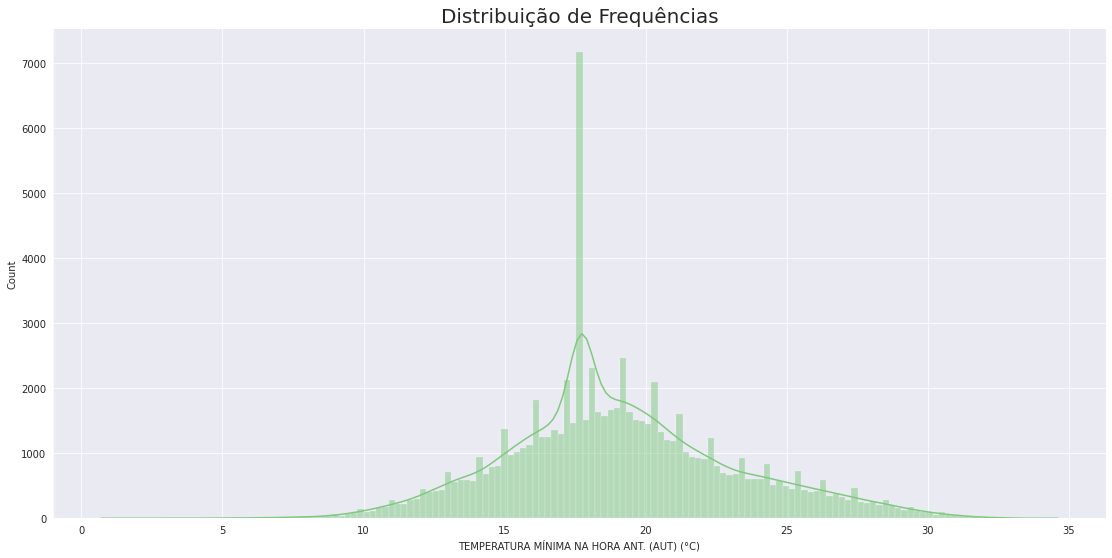

In [68]:
ax = sns.displot(df['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'], kde=True)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Temperatura Mínima'}, ylabel='ºC'>

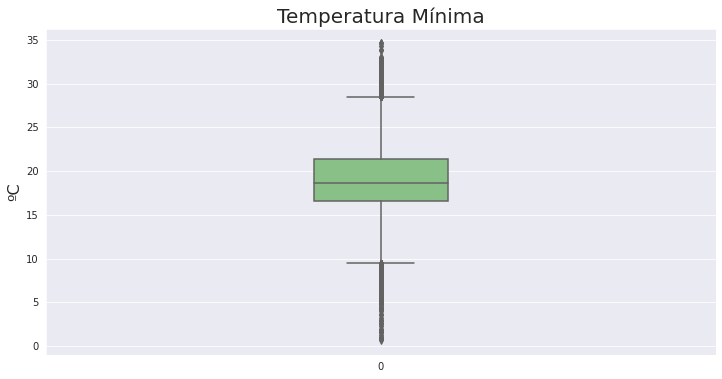

In [69]:
ax = sns.boxplot(data=df['TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Temperatura Mínima', fontsize=20)
ax.set_ylabel('ºC', fontsize=16)
ax

Text(0.5, 1.0, 'Distribuição de Frequências')

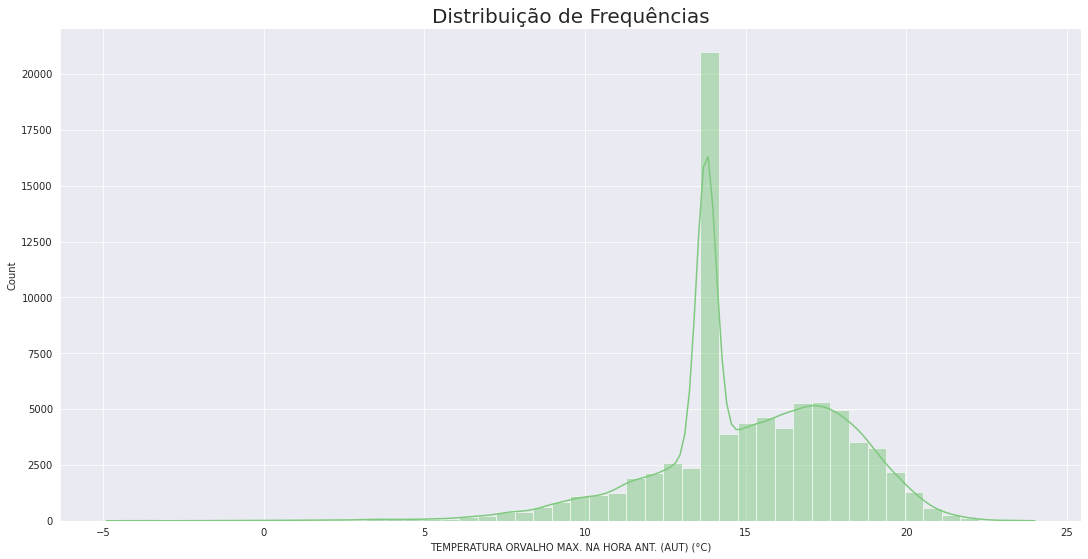

In [70]:
ax = sns.displot(df['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'], kde=True, bins=50)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Temperatura Orvalho Max.'}, ylabel='ºC'>

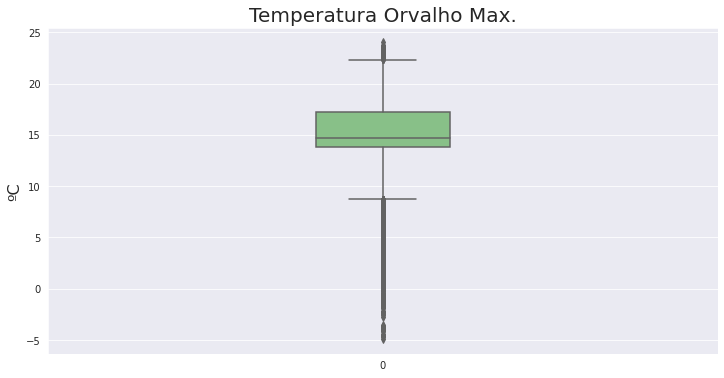

In [71]:
ax = sns.boxplot(data=df['TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Temperatura Orvalho Max.', fontsize=20)
ax.set_ylabel('ºC', fontsize=16)
ax

Text(0.5, 1.0, 'Distribuição de Frequências')

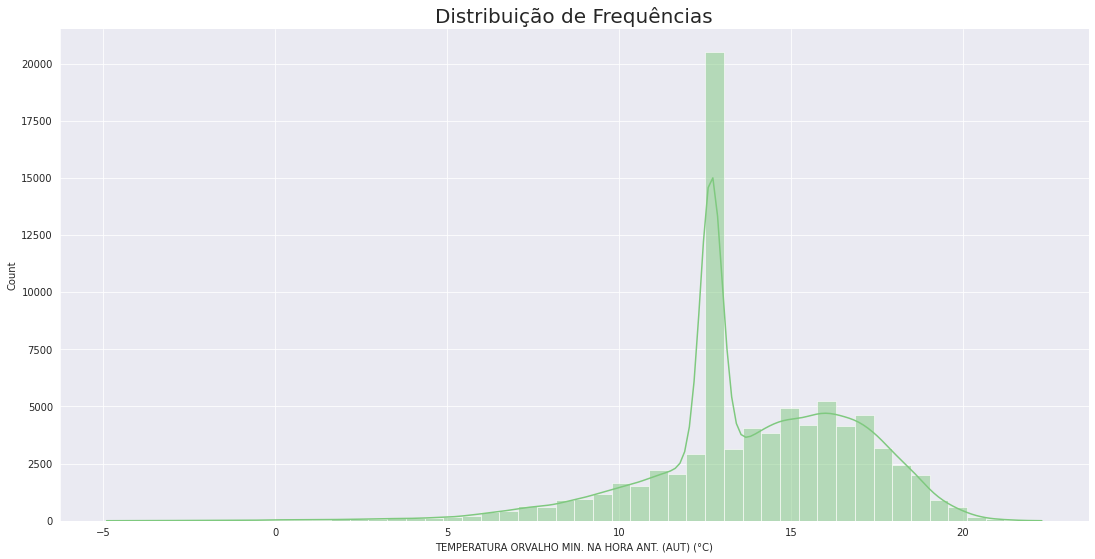

In [72]:
ax = sns.displot(df['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'], kde=True, bins=50)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Temperatura Orvalho Min.'}, ylabel='ºC'>

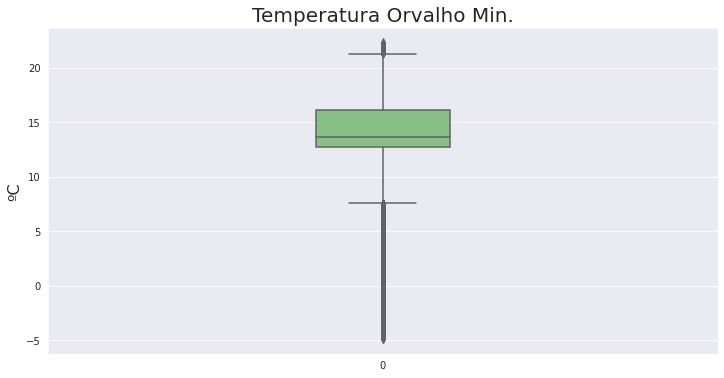

In [73]:
ax = sns.boxplot(data=df['TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Temperatura Orvalho Min.', fontsize=20)
ax.set_ylabel('ºC', fontsize=16)
ax

Text(0.5, 1.0, 'Distribuição de Frequências')

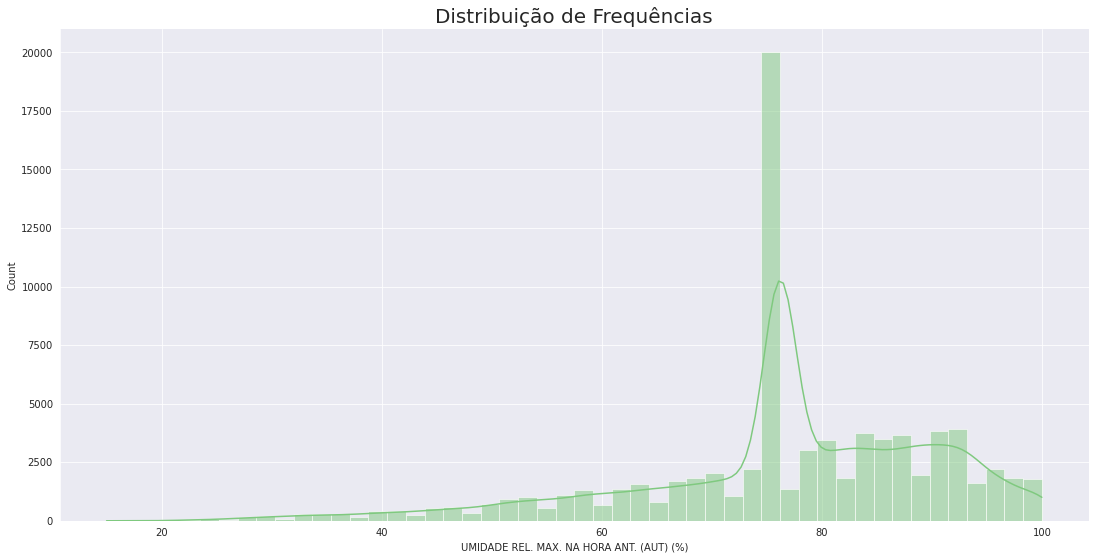

In [74]:
ax = sns.displot(df['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'], kde=True, bins=50)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Umidae Rel. Max.'}, ylabel='%'>

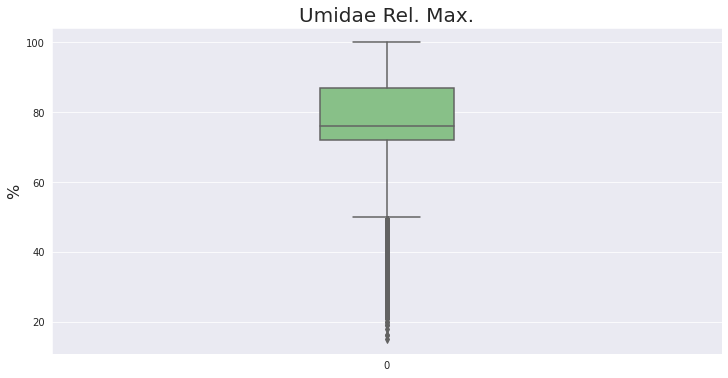

In [75]:
ax = sns.boxplot(data=df['UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Umidae Rel. Max.', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax

Text(0.5, 1.0, 'Distribuição de Frequências')

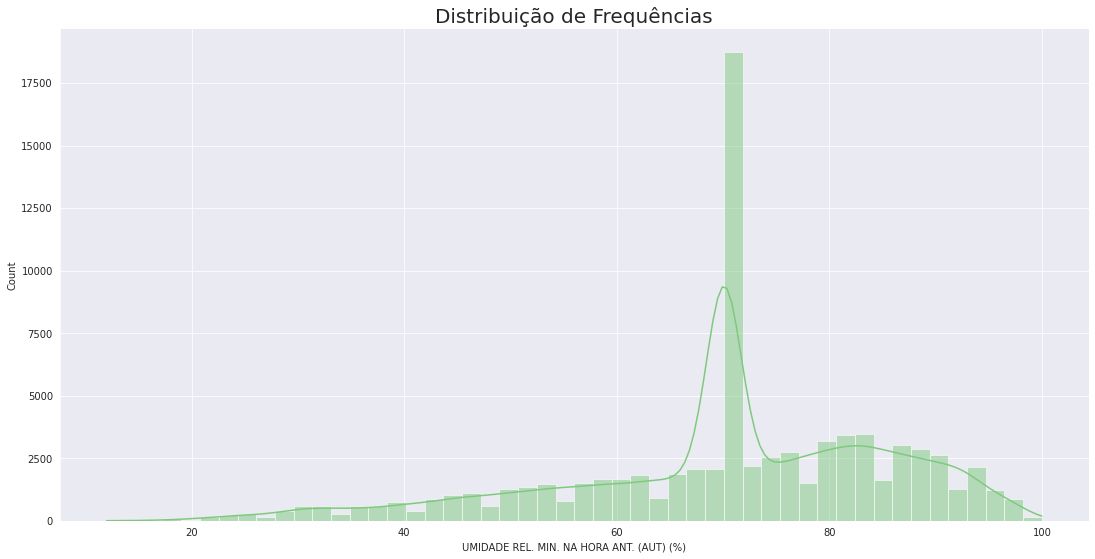

In [76]:
ax = sns.displot(df['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'], kde=True, bins=50)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Umidae Rel. Min.'}, ylabel='%'>

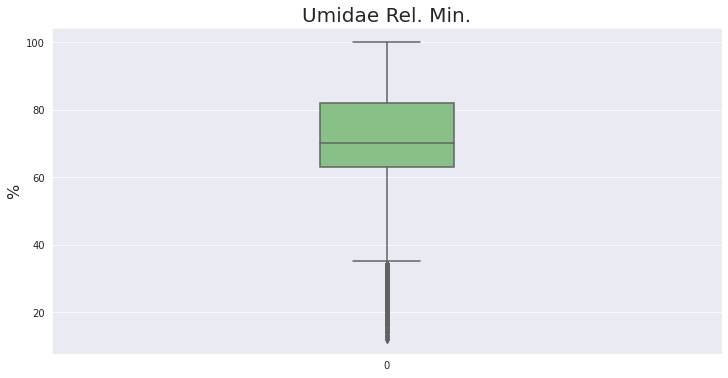

In [77]:
ax = sns.boxplot(data=df['UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Umidae Rel. Min.', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax

Text(0.5, 1.0, 'Distribuição de Frequências')

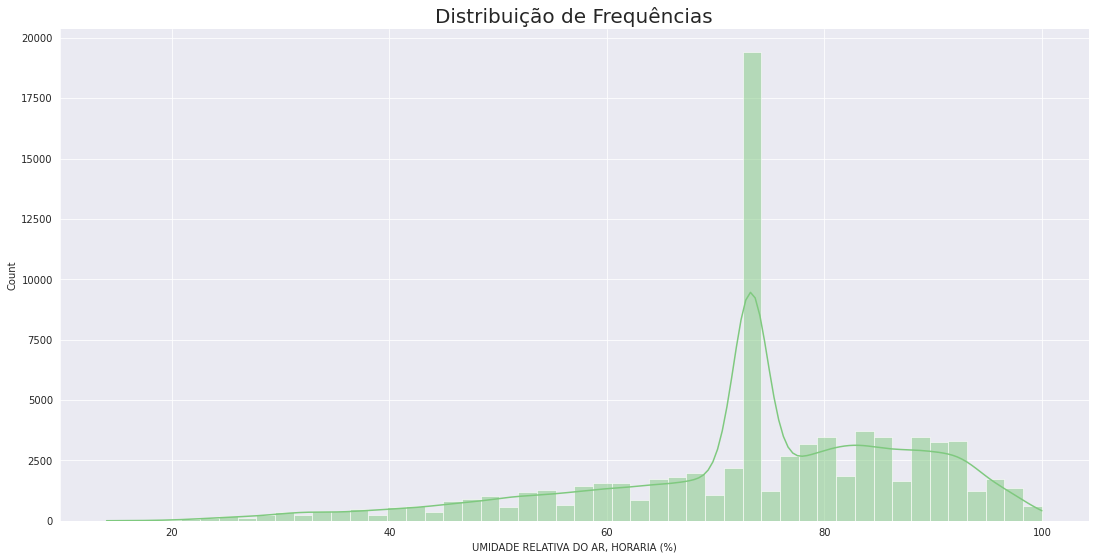

In [78]:
ax = sns.displot(df['UMIDADE RELATIVA DO AR, HORARIA (%)'], kde=True, bins=50)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Umidae Relativa do Ar'}, ylabel='%'>

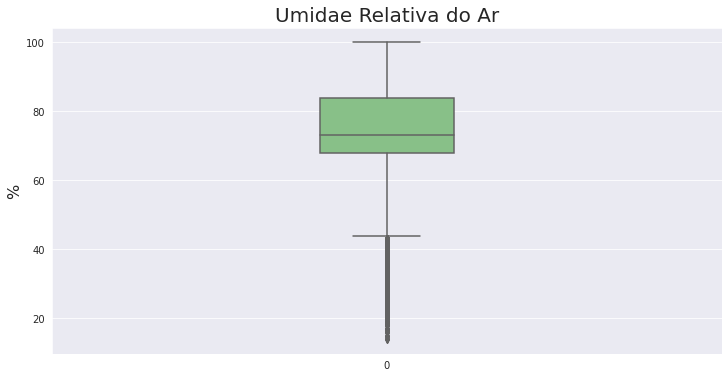

In [79]:
ax = sns.boxplot(data=df['UMIDADE RELATIVA DO AR, HORARIA (%)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Umidae Relativa do Ar', fontsize=20)
ax.set_ylabel('%', fontsize=16)
ax

Text(0.5, 1.0, 'Distribuição de Frequências')

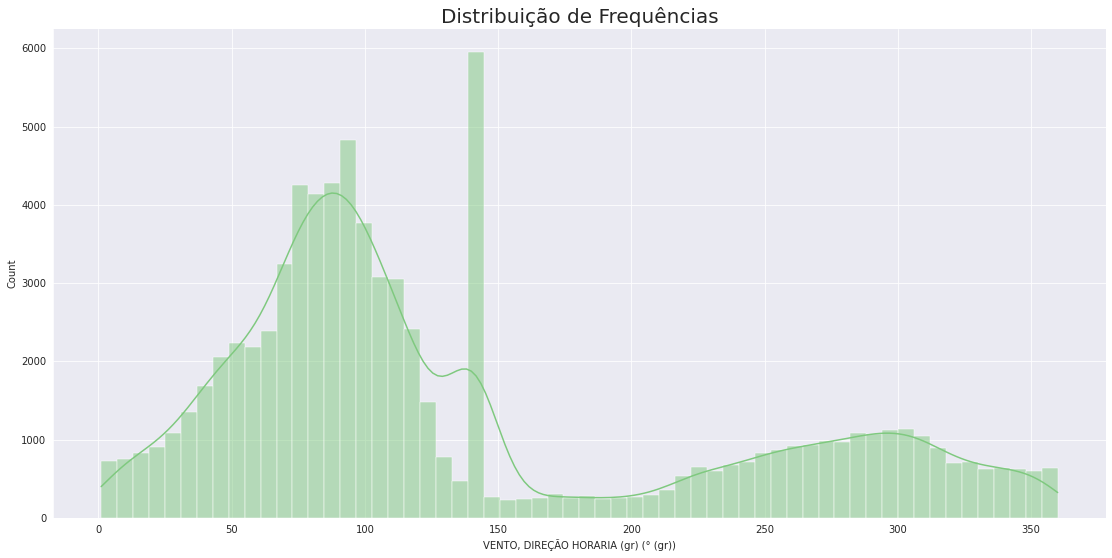

In [80]:
ax = sns.displot(df['VENTO, DIREÇÃO HORARIA (gr) (° (gr))'], kde=True)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Vento'}, ylabel='gr'>

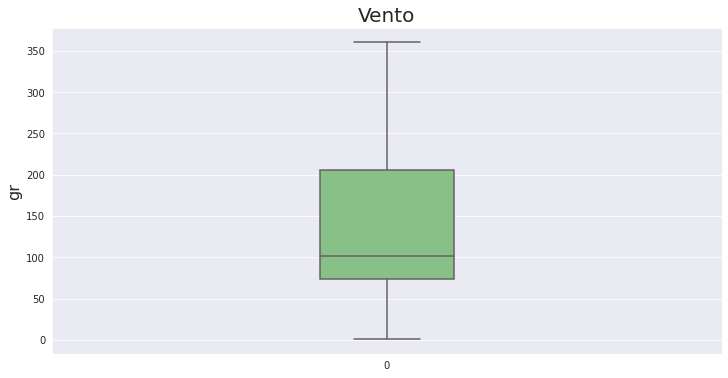

In [81]:
ax = sns.boxplot(data=df['VENTO, DIREÇÃO HORARIA (gr) (° (gr))'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Vento', fontsize=20)
ax.set_ylabel('gr', fontsize=16)
ax

Text(0.5, 1.0, 'Distribuição de Frequências')

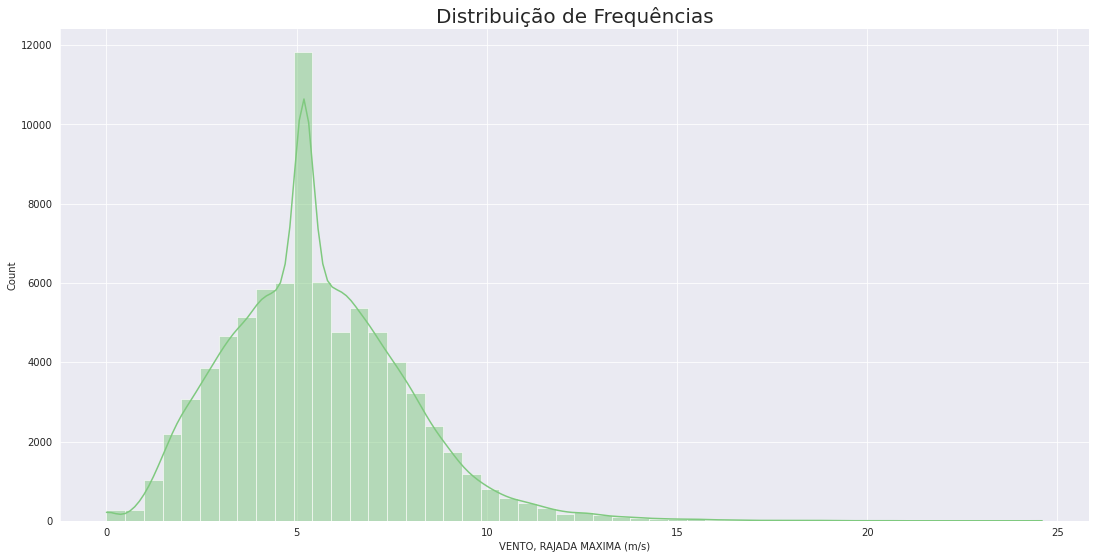

In [82]:
ax = sns.displot(df['VENTO, RAJADA MAXIMA (m/s)'], kde=True, bins=50)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Vento, Rajada Max.'}, ylabel='m/s'>

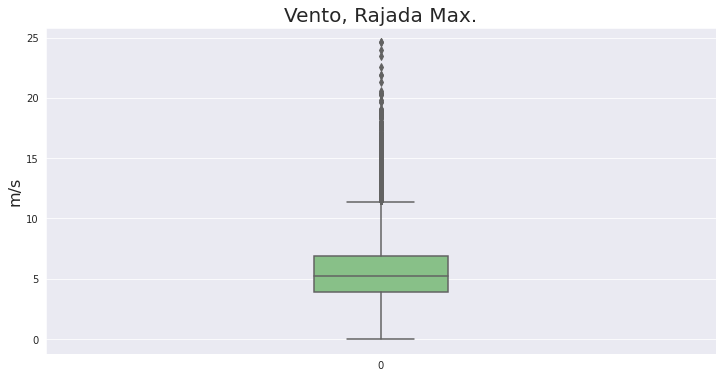

In [83]:
ax = sns.boxplot(data=df['VENTO, RAJADA MAXIMA (m/s)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Vento, Rajada Max.', fontsize=20)
ax.set_ylabel('m/s', fontsize=16)
ax

Text(0.5, 1.0, 'Distribuição de Frequências')

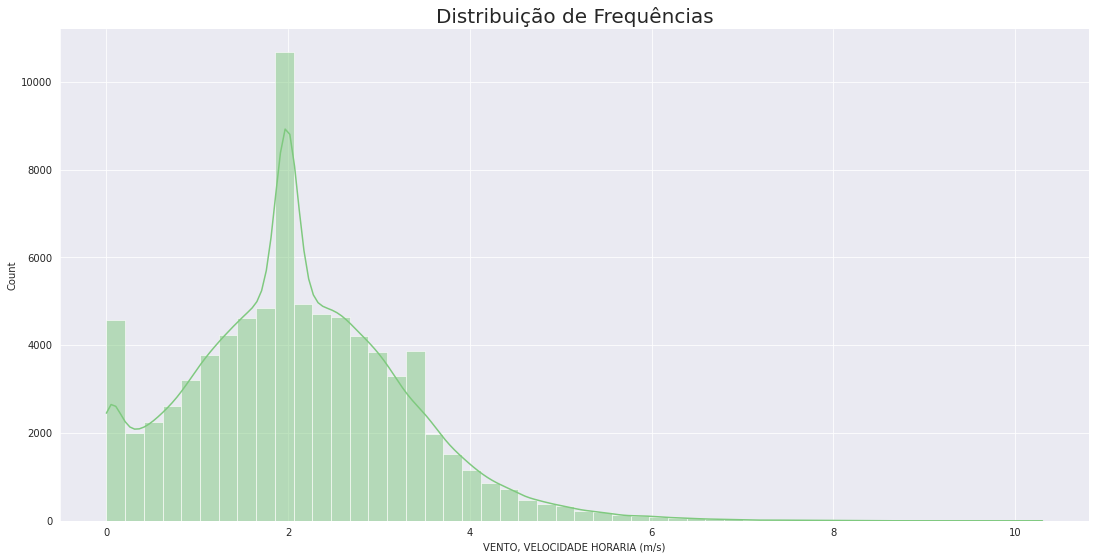

In [84]:
ax = sns.displot(df['VENTO, VELOCIDADE HORARIA (m/s)'], kde=True, bins=50)
ax.figure.set_size_inches(18,8)
plt.title('Distribuição de Frequências', fontsize=20)

<AxesSubplot:title={'center':'Vento, Velocidade.'}, ylabel='m/s'>

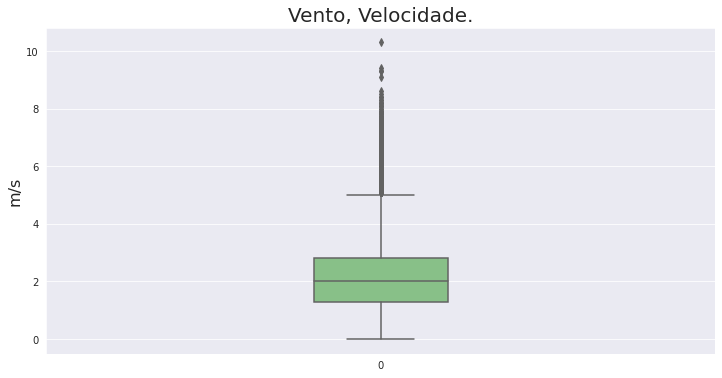

In [85]:
ax = sns.boxplot(data=df['VENTO, VELOCIDADE HORARIA (m/s)'], orient='v', width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Vento, Velocidade.', fontsize=20)
ax.set_ylabel('m/s', fontsize=16)
ax

In [86]:
# ax = sns.displot(df['VENTO, VELOCIDADE HORARIA (m/s)'], kde=True)
# ax.figure.set_size_inches(18,8)
# plt.title("Título", fontdict = {'fontsize': 20})